# Titanic Dataset (Kaggle Problem)
*We are given a dataset which has information about the people who were on Titanic and the information whether they survived or not. Based on the dataset we have to train a machine learning model to predict whether a person survived or not.*

In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Reading and inspecting the data

In [263]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [194]:
df.shape

(891, 12)

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Null Treatment

In [196]:
round(100*(df.isnull().sum()/len(df)), 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

We see that firstly the dataset is very small (only 891 rows), so we can't afford to drop null values. But we can drop 'Cabin' variable since it's Null rate is 77% and we will drop 'Age' column as well since 20% Null rate is significant as well and we will the 'Embarked' column with it's mode since it's a Categorical variable and that's what the convention is.

In [197]:
df.drop(['Age', 'Cabin'], axis = 1, inplace = True)

In [198]:
df['Embarked'].mode()

0    S
dtype: object

In [199]:
df['Embarked'].fillna('S', inplace = True)

In [200]:
df['Ticket'].value_counts().sum()

891

*We can also drop columns like 'Ticket' since it has 891 types of ticket which will not be feasible while creating dummy variables*

In [201]:
df.drop('Ticket', axis = 1, inplace = True)

### Exploratory Data Analysis

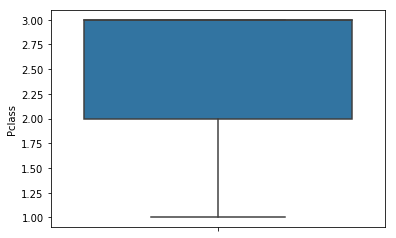

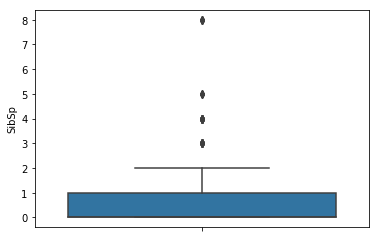

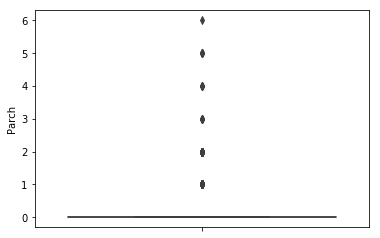

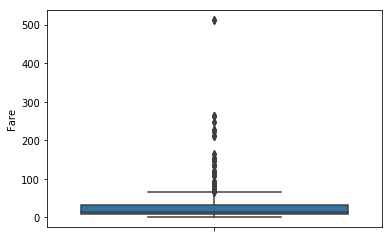

In [202]:
for i in df.drop(['PassengerId', 'Survived'], axis = 1).select_dtypes(exclude = 'object').columns:
    sns.boxplot(y = df[i])
    plt.show()

We can see the presence of outliers in the data and we need to take care of it.

In [203]:
for i in df.drop(['PassengerId', 'Survived'], axis = 1).select_dtypes(exclude = 'object').columns:
    df[i] = df[i].apply(lambda x : np.quantile(df[i], 0.95) if x >= np.quantile(df[i], 0.95) else x)

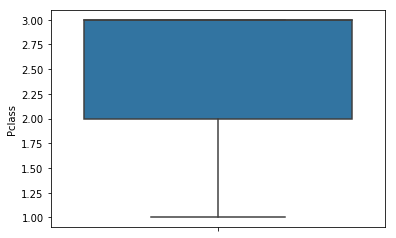

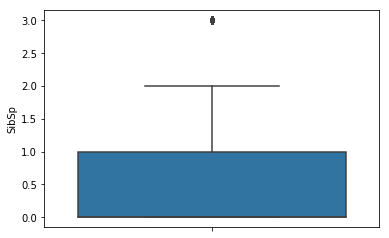

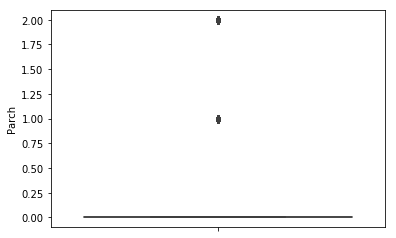

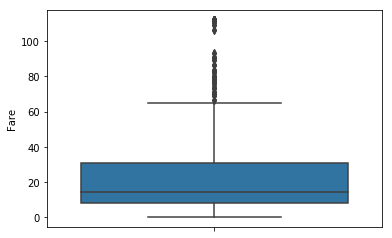

In [204]:
for i in df.drop(['PassengerId', 'Survived'], axis = 1).select_dtypes(exclude = 'object').columns:
    sns.boxplot(y = df[i])
    plt.show()

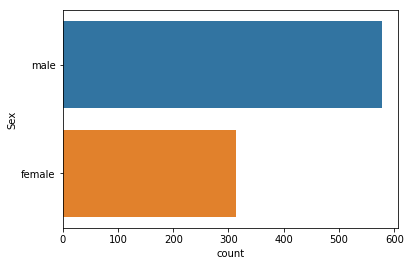

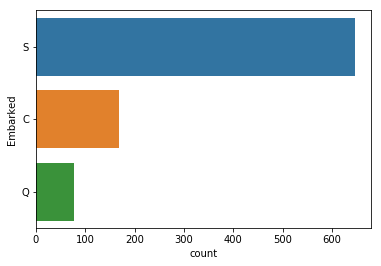

In [205]:
for i in df.drop(['PassengerId', 'Survived', 'Name'], axis = 1).select_dtypes(include = 'object').columns:
    sns.countplot(y = df[i])
    plt.show()

In [206]:
# Final list of columns
columns = df.drop(['PassengerId', 'Name'], axis = 1).columns

### Model Building

In [207]:
DF = df[columns]

*Categorical to Numerical Conversion*

In [208]:
DF['Sex'] = DF['Sex'].apply(lambda x : 1 if x.lower() == 'male' else 0)

In [209]:
dummy = pd.get_dummies(DF['Embarked'])

*We will drop 'Q' dummy since it has the least number of 1's which means compared to other categories, it has the highest skewness*

In [ ]:
dummy.drop('Q', axis = 1, inplace = True)

In [210]:
DF = pd.concat([DF, dummy], axis = 1)

In [211]:
DF.drop('Embarked', axis = 1, inplace = True)
DF.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,C,S
0,0,3.0,1,1.0,0.0,7.2500,0,1
1,1,1.0,0,1.0,0.0,71.2833,1,0
2,1,3.0,0,0.0,0.0,7.9250,0,1
3,1,1.0,0,1.0,0.0,53.1000,0,1
4,0,3.0,1,0.0,0.0,8.0500,0,1


*Splitting the Dataset*

In [212]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(DF, train_size = 0.7, random_state = 100)

*Scaling the variables*

In [213]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train[[i for i in DF.select_dtypes(exclude = 'object').columns if DF[i].nunique() > 2]] = scaler.fit_transform(df_train[[i for i in DF.select_dtypes(exclude = 'object').columns if DF[i].nunique() > 2]])
df_test[[i for i in DF.select_dtypes(exclude = 'object').columns if DF[i].nunique() > 2]] = scaler.transform(df_test[[i for i in DF.select_dtypes(exclude = 'object').columns if DF[i].nunique() > 2]])

*Train and Test data*

In [214]:
X_train = df_train.drop('Survived', axis = 1)
y_train = df_train['Survived']

In [215]:
X_test = df_test.drop('Survived', axis = 1)
y_test = df_test['Survived']

#### *Model 1*

In [216]:
import statsmodels.api as sm
classifier1 = sm.GLM(y_train, sm.add_constant(X_train), family = sm.families.Binomial())
classifier1 = classifier1.fit()
classifier1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  623
Model:                            GLM   Df Residuals:                      615
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -279.85
Date:                Mon, 02 Mar 2020   Deviance:                       559.70
Time:                        11:50:04   Pearson chi2:                     649.
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0156      0.370      2.745      0.006       0.291       1.741
Pclass        -0.7077      0.156     -4.550      0.000      -1.013      -0.403
Sex           -2.8285      0.244    -11.601      0.000      -3.306      -2.351
SibSp         -0.1693      0.130     -1.300      0.194      -0.425       0.086
Parch         -0.1086      0.124     -0.879      0.380      -0.351       0.134
Fare           0.1190      0.171      0.694      0.487      -0.217       0.455
C              0.5142      0.458      1.123      0.261      -0.383       1.412
S              0.0272      0.394      0.069      0.945      -0.746       0.800
==============================================================================
"""

*Dropping 'S' column*

In [217]:
X_train.drop('S', axis = 1, inplace = True)

#### *Model 2*

In [218]:
classifier2 = sm.GLM(y_train, sm.add_constant(X_train), family = sm.families.Binomial())
classifier2 = classifier2.fit()
classifier2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  623
Model:                            GLM   Df Residuals:                      616
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -279.85
Date:                Mon, 02 Mar 2020   Deviance:                       559.71
Time:                        11:50:04   Pearson chi2:                     650.
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0379      0.181      5.748      0.000       0.684       1.392
Pclass        -0.7099      0.152     -4.658      0.000      -1.009      -0.411
Sex           -2.8256      0.240    -11.771      0.000      -3.296      -2.355
SibSp         -0.1684      0.129     -1.300      0.194      -0.422       0.085
Parch         -0.1074      0.122     -0.878      0.380      -0.347       0.132
Fare           0.1179      0.171      0.691      0.489      -0.216       0.452
C              0.4895      0.283      1.729      0.084      -0.065       1.044
==============================================================================
"""

*Dropping 'Fare' column*

In [219]:
X_train.drop('Fare', axis = 1, inplace = True)

#### *Model 3*

In [220]:
classifier3 = sm.GLM(y_train, sm.add_constant(X_train), family = sm.families.Binomial())
classifier3 = classifier3.fit()
classifier3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  623
Model:                            GLM   Df Residuals:                      617
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -280.09
Date:                Mon, 02 Mar 2020   Deviance:                       560.19
Time:                        11:50:04   Pearson chi2:                     655.
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0221      0.178      5.735      0.000       0.673       1.371
Pclass        -0.7826      0.111     -7.062      0.000      -1.000      -0.565
Sex           -2.8271      0.239    -11.804      0.000      -3.297      -2.358
SibSp         -0.1408      0.123     -1.143      0.253      -0.382       0.101
Parch         -0.0820      0.117     -0.702      0.483      -0.311       0.147
C              0.5327      0.275      1.934      0.053      -0.007       1.073
==============================================================================
"""

*Dropping 'Parch' column*

In [221]:
X_train.drop('Parch', axis = 1, inplace = True)

#### *Model 4*

In [222]:
classifier4 = sm.GLM(y_train, sm.add_constant(X_train), family = sm.families.Binomial())
classifier4 = classifier4.fit()
classifier4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  623
Model:                            GLM   Df Residuals:                      618
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -280.34
Date:                Mon, 02 Mar 2020   Deviance:                       560.68
Time:                        11:50:04   Pearson chi2:                     649.
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9992      0.175      5.720      0.000       0.657       1.342
Pclass        -0.7808      0.111     -7.049      0.000      -0.998      -0.564
Sex           -2.7930      0.233    -11.962      0.000      -3.251      -2.335
SibSp         -0.1786      0.111     -1.611      0.107      -0.396       0.039
C              0.5290      0.275      1.924      0.054      -0.010       1.068
==============================================================================
"""

*Dropping 'SibSp' column*

In [223]:
X_train.drop('SibSp', axis = 1, inplace = True)

#### *Model 5*

In [224]:
classifier5 = sm.GLM(y_train, sm.add_constant(X_train), family = sm.families.Binomial())
classifier5 = classifier5.fit()
classifier5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  623
Model:                            GLM   Df Residuals:                      619
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -281.68
Date:                Mon, 02 Mar 2020   Deviance:                       563.35
Time:                        11:50:04   Pearson chi2:                     647.
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9376      0.169      5.562      0.000       0.607       1.268
Pclass        -0.7843      0.111     -7.091      0.000      -1.001      -0.568
Sex           -2.7052      0.224    -12.060      0.000      -3.145      -2.266
C              0.5556      0.274      2.026      0.043       0.018       1.093
==============================================================================
"""

In [225]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,C,1.19
1,Sex,1.13
0,Pclass,1.09


All the values, whether it be p-values or VIF, fall within appropriate range so we can use the above set as our final list of columns.

In [226]:
final_columns = X_train.columns

In [227]:
y_pred = classifier5.predict(sm.add_constant(X_train))

*Storing the predictions and actual values of the training dataset*

In [228]:
results = pd.DataFrame({'Actual values': y_train, 'Predicted values': y_pred})
results.head()

,Actual values,Predicted values
69,0,0.080960
85,1,0.568514
794,0,0.080960
161,1,0.770057
815,0,0.362695


*Let's plot the ROC curve to figure out the optimal value of the threshold*

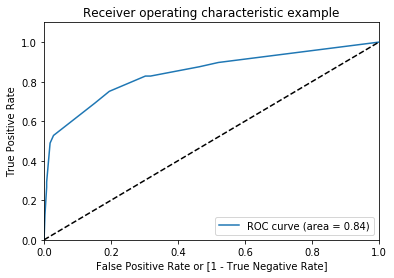

In [229]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(results['Actual values'], results['Predicted values'], drop_intermediate = False)
auc_score = metrics.roc_auc_score(results['Actual values'], results['Predicted values'])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

*Let's create a dataframe that tells us about the prediction of the model based on different cut-off values*

In [230]:
cut_off = pd.DataFrame()
cut_off['Churn'] = results['Actual values']
for i in [j/10 for j in range(11)]:
    cut_off[i] = results['Predicted values'].apply(lambda x : 1 if x > i else 0)
cut_off.head()

,Churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
69,0,1,0,0,0,0,0,0,0,0,0,0
85,1,1,1,1,1,1,1,0,0,0,0,0
794,0,1,0,0,0,0,0,0,0,0,0,0
161,1,1,1,1,1,1,1,1,1,0,0,0
815,0,1,1,1,1,0,0,0,0,0,0,0


In [231]:
cut_off2 = pd.DataFrame(columns = ['Cut-off', 'Accuracy', 'Sensitivity', 'Specificity'])
for i in [j/10 for j in range(0, 11)]:
    c_m = metrics.confusion_matrix(cut_off['Churn'], cut_off[i])
    total = sum(sum(c_m))
    accuracy = (c_m[0,0] + c_m[1,1])/total
    specificity = c_m[0,0]/(c_m[0,0] + c_m[0,1])
    sensitivity = c_m[1,1]/(c_m[1,0] + c_m[1,1])
    cut_off2.loc[i] =[i, accuracy, sensitivity, specificity]
cut_off2

,Cut-off,Accuracy,Sensitivity,Specificity
0.0,0.0,0.373997,1.000000,0.000000
0.1,0.1,0.635634,0.896996,0.479487
0.2,0.2,0.736758,0.828326,0.682051
0.3,0.3,0.746388,0.828326,0.697436
0.4,0.4,0.784912,0.751073,0.805128
0.5,0.5,0.789727,0.690987,0.848718
0.6,0.6,0.805778,0.527897,0.971795
0.7,0.7,0.797753,0.489270,0.982051
0.8,0.8,0.730337,0.291845,0.992308
0.9,0.9,0.670947,0.124464,0.997436


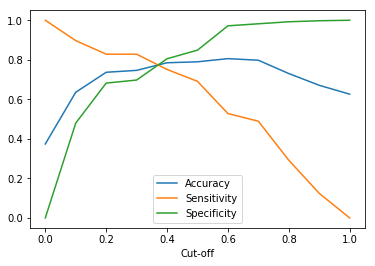

In [232]:
cut_off2.plot.line(x = 'Cut-off', y = ['Accuracy', 'Sensitivity', 'Specificity'])

*From the graph, it's evident that the Accuracy, Sensitivity and Specificity peak at a cut-off close to 0.4. Let's take cut-off to be 0.39 from this curve. We will also plot the precision and recall curve to make that choice*

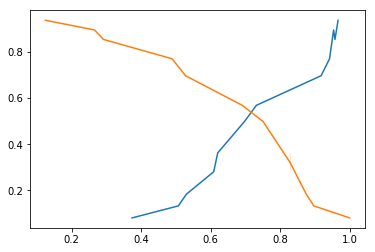

In [233]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds2 = precision_recall_curve(cut_off['Churn'], results['Predicted values'])
sns.lineplot(precision[:-1], thresholds2)
sns.lineplot(recall[:-1], thresholds2)

*The cut-off from the above graph comes out to be 0.7. But we won't choose it since both the precision and recall aren't enough for this value and the other 3 parameters get's affected with this choice as well*

In [234]:
test_df = pd.DataFrame()
test_df['Probability Predictions'] = classifier5.predict(sm.add_constant(X_test[final_columns]))
test_df['Final'] = test_df['Probability Predictions'].apply(lambda x : 1 if x > 0.39 else 0)
test_df['Actual'] = y_test
test_df.head()

,Probability Predictions,Final,Actual
205,0.568514,1,0
44,0.568514,1,1
821,0.080960,0,1
458,0.770057,1,1
795,0.182944,0,0


In [235]:
# Confusion Matrix
metrics.confusion_matrix(test_df['Actual'], test_df['Final'])

array([[129,  30],
       [ 34,  75]], dtype=int64)

In [236]:
# Accuracy
round(metrics.accuracy_score(test_df['Actual'], test_df['Final']), 2)

0.76

In [237]:
# Sensitivity
round(75/(75+34), 2)

0.69

In [250]:
df_test_data = pd.read_csv('test.csv')
df_test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [251]:
df_test_data['C'] = df_test_data['Embarked'].apply(lambda x : 1 if x == 'C' else 0)

In [252]:
df_test_data['Sex'] = df_test_data['Sex'].apply(lambda x : 1 if x == 'male' else 0)

In [253]:
df_test_data1 = df_test_data[final_columns]
df_test_data1.head()

,Pclass,Sex,C
0,3,1,0
1,3,0,0
2,2,1,0
3,3,1,0
4,3,0,0


In [255]:
y_pred_test_data = classifier5.predict(sm.add_constant(df_test_data1))

In [256]:
y_pred_test_data = y_pred_test_data.apply(lambda x : 1 if x > 0.39 else 0)

In [258]:
predictions = pd.DataFrame()
predictions['PassengerId'] = df_test_data['PassengerId']
predictions['Prediction'] = y_pred_test_data

In [260]:
predictions.set_index('PassengerId', inplace = True)

In [262]:
predictions.to_csv('Titanic Predictions.csv')

*After Submissions on the Kaggle platform, the score came out to be 0.72727*